In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)

math_scores = np.random.normal(70, 10, 100)
physics_scores = math_scores + np.random.normal(5, 5, 100) 
biology_scores = np.random.normal(60, 10, 100)

data = {
    'Math': math_scores,
    'Physics': physics_scores,
    'Biology': biology_scores
}

df_scores = pd.DataFrame(data)
df_scores

,Math,Physics,Biology
0,74.967142,72.890288,63.577874
1,68.617357,71.514130,65.607845
2,76.476885,79.763313,70.830512
3,85.230299,86.218912,70.538021
4,67.658466,71.852038,46.223306
...,...,...,...
95,55.364851,62.291437,53.070904
96,72.961203,73.541916,68.995999
97,72.610553,78.379178,63.072995
98,70.051135,75.342178,68.128621


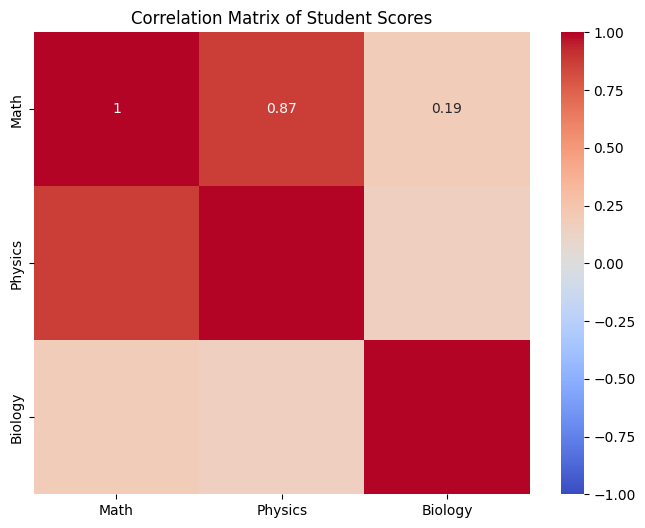

In [32]:
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix of Student Scores')
sns.heatmap(df_scores.corr(), annot=True, cmap='coolwarm',  vmax=1, vmin=-1)
plt.show()

In [11]:
scaler = StandardScaler()
scaled_scores = scaler.fit_transform(df_scores)

pca = PCA(n_components=3)
pca_scores = pca.fit_transform(scaled_scores)

df_pca = pd.DataFrame(data=pca_scores, columns=['PC1', 'PC2', 'PC3'])
df_pca

,PC1,PC2,PC3
0,-0.441450,0.178039,-0.551341
1,0.089538,0.503330,-0.148945
2,-1.215419,0.657963,-0.149630
3,-2.329985,0.339597,-0.364636
4,0.599192,-1.222396,-0.093776
...,...,...,...
95,2.046512,-0.188554,0.186888
96,-0.464249,0.686129,-0.333590
97,-0.639589,0.061868,0.034561
98,-0.350413,0.623878,0.024733


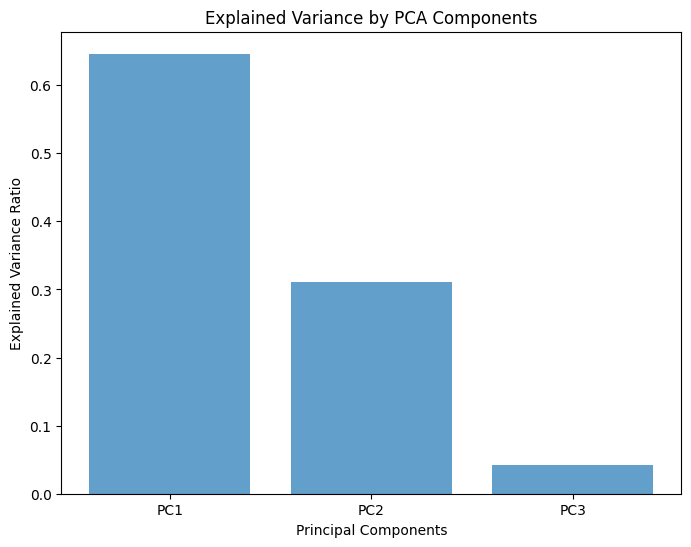

In [12]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, 4), explained_variance, alpha=0.7, tick_label=['PC1', 'PC2', 'PC3'])
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by PCA Components')
plt.show()

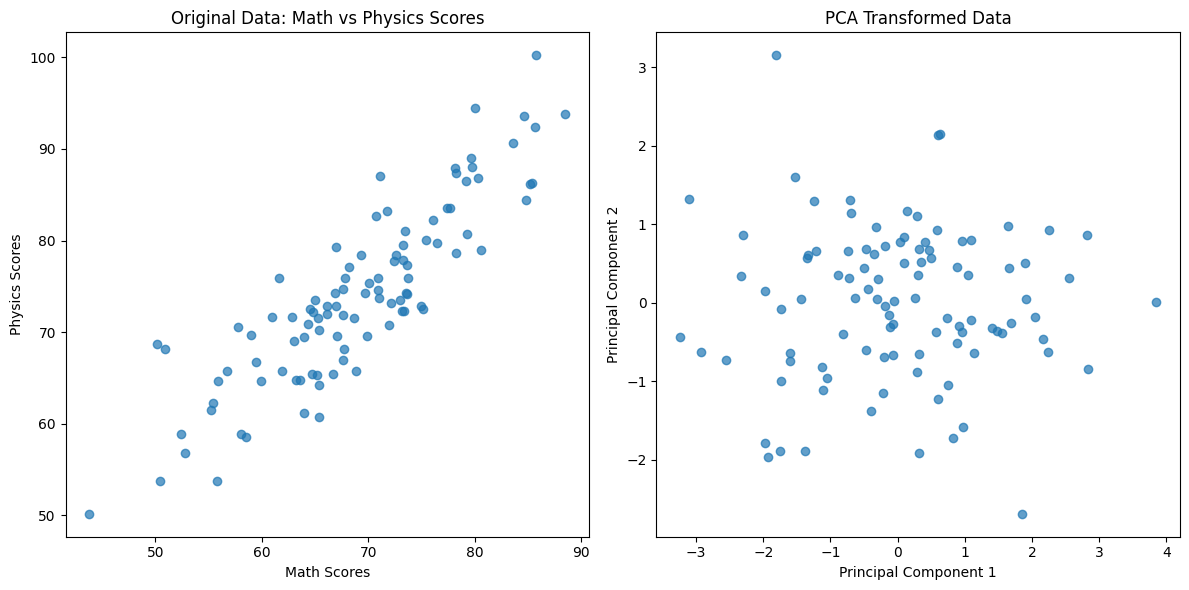

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_scores['Math'], df_scores['Physics'], alpha=0.7)
plt.xlabel('Math Scores')
plt.ylabel('Physics Scores')
plt.title('Original Data: Math vs Physics Scores')

plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.tight_layout()
plt.show()

### COMPLETE MATHEMATICAL IMPLEMENTATION

In [28]:
def pca_from_scratch(X, n_components):
    # Standardizing
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Covariance matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)
    
    # Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sorting eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top n_components eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
    
    # Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_standardized.transpose()).transpose()
    
    return X_reduced

In [29]:
df_pca_calc = pd.DataFrame(pca_from_scratch(df_scores, 3), columns = ['PC1', 'PC2', 'PC3'])
df_pca_calc

,PC1,PC2,PC3
0,-0.441450,0.178039,-0.551341
1,0.089538,0.503330,-0.148945
2,-1.215419,0.657963,-0.149630
3,-2.329985,0.339597,-0.364636
4,0.599192,-1.222396,-0.093776
...,...,...,...
95,2.046512,-0.188554,0.186888
96,-0.464249,0.686129,-0.333590
97,-0.639589,0.061868,0.034561
98,-0.350413,0.623878,0.024733


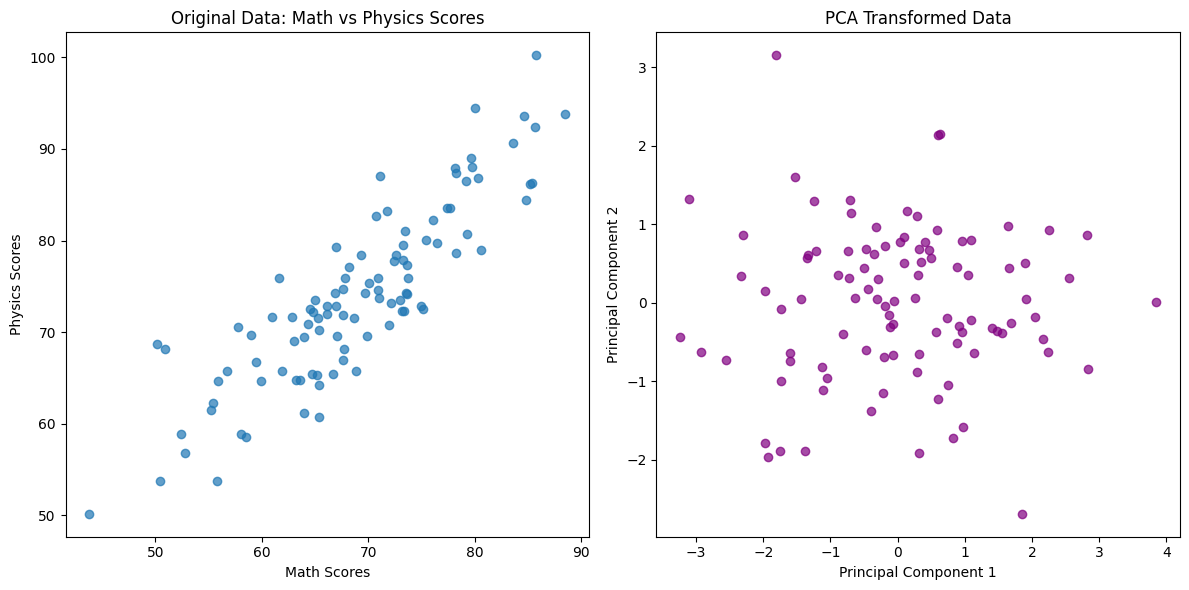

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_scores['Math'], df_scores['Physics'], alpha=0.7)
plt.xlabel('Math Scores')
plt.ylabel('Physics Scores')
plt.title('Original Data: Math vs Physics Scores')

plt.subplot(1, 2, 2)
plt.scatter(df_pca_calc['PC1'], df_pca_calc['PC2'], alpha=0.7, color='purple')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.tight_layout()
plt.show()